In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data<-read_csv("data/lab.csv",skip=1)
data<-data|>mutate(Time=as.factor(Time))|>
mutate(temp=as.factor(temp))|>
mutate(embryos_percent=embryos_percent*100)

data

Rows: 38 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Lab_section, Max_developmental_stage_reached, Any_notable_features,...
dbl (5): Time, temp, embyos, embryos_percent, stage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Lab_section,Time,temp,embyos,embryos_percent,Max_developmental_stage_reached,Any_notable_features,Surviving_at_24,stage
<chr>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
L02,24,18,5,0.8375209,11to11.5,yolk plug sometimes visible,Y,11.25
L03,24,18,21,3.5175879,12to12.5,late gastrula / early neurula (see signs of neural plate),Y,12.25
L02,24,23,6,1.0714286,19to20,"clear signs of neurulation, elongation of embryo (no longer spherical)",Y,19.50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA


Warning message:
“Removed 26 rows containing missing values (`position_stack()`).”


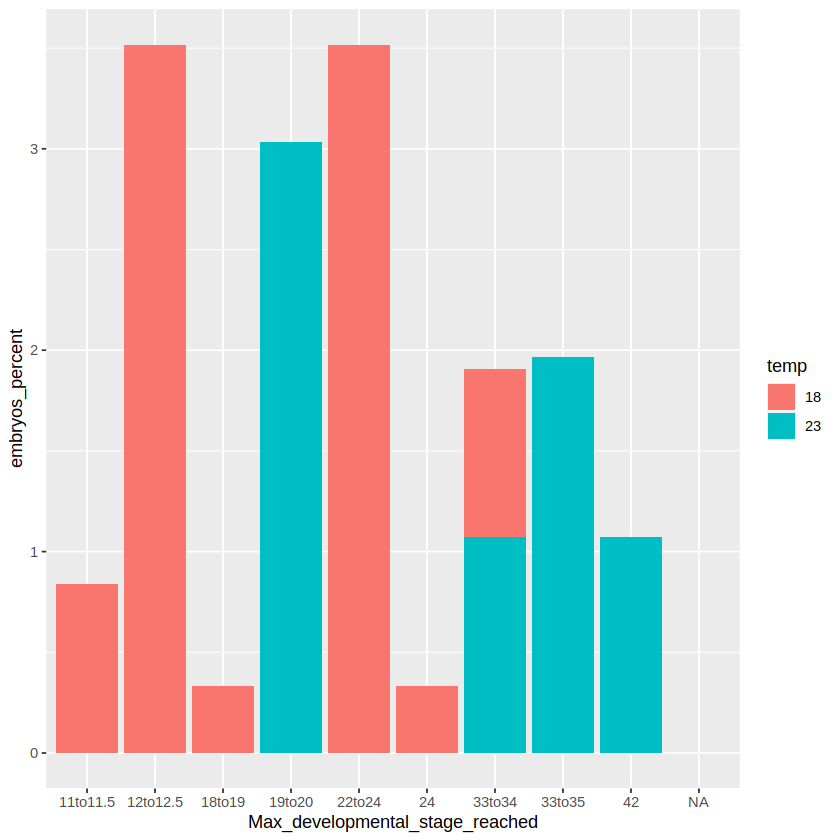

In [3]:
ggplot(data,aes(x=Max_developmental_stage_reached,y=embryos_percent, fill=temp))+
geom_bar(stat="identity")

Warning message:
“Removed 26 rows containing missing values (`position_stack()`).”


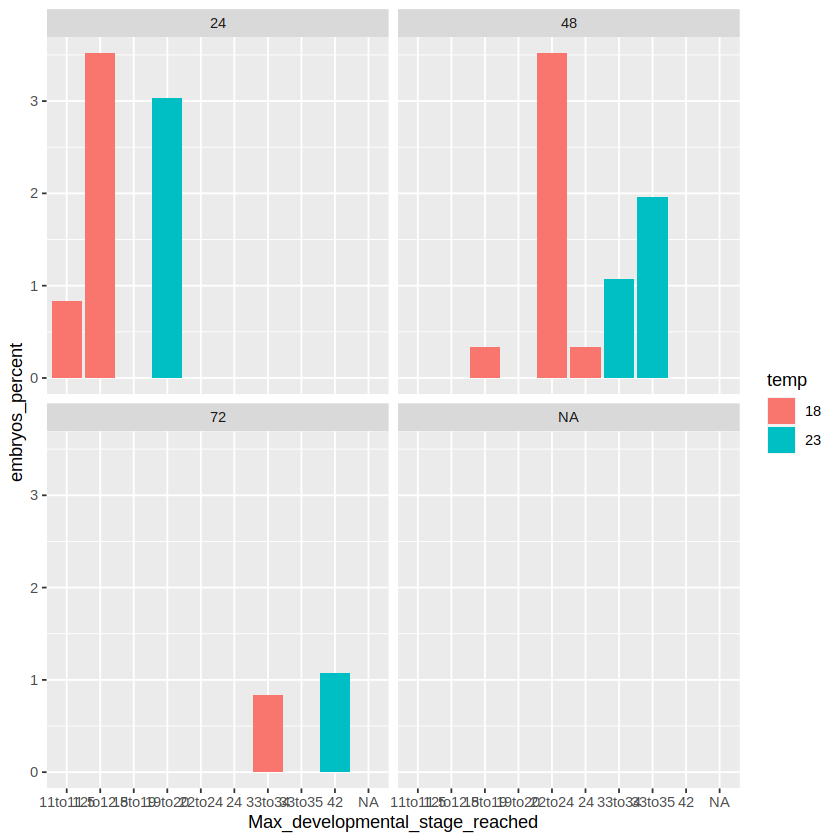

In [4]:
ggplot(data,aes(x=Max_developmental_stage_reached,y=embryos_percent, fill=temp))+
geom_bar(stat="identity")+
facet_wrap(~Time)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 26 rows containing non-finite values (`stat_bin()`).”


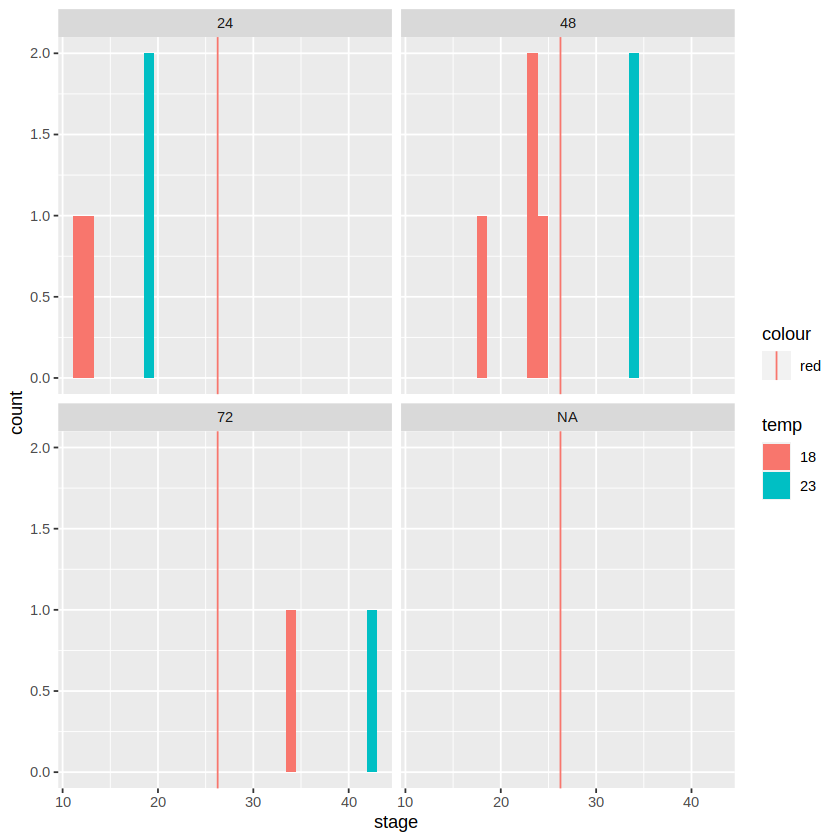

In [5]:
ggplot(data, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=26.26, color="red"))+

#geom_vline(aes(xintercept=14, color=temp))+
#geom_vline(aes(xintercept=14, color=temp))+
#geom_vline(aes(xintercept=14, color=temp))+
facet_wrap(~Time)


In [6]:
everagedata<-data|>group_by(Time, temp)|>summarize(avegare=mean(embryos_percent))
print(everagedata)

`summarise()` has grouped output by 'Time'. You can override using the
`.groups` argument.


# A tibble: 7 × 3
# Groups:   Time [4]
  Time  temp  avegare
  <fct> <fct>   <dbl>
1 24    18      2.18 
2 24    23      1.52 
3 48    18      1.05 
4 48    23      1.52 
5 72    18      0.838
6 72    23      1.07 
7 NA    NA     NA    


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 26 rows containing non-finite values (`stat_bin()`).”


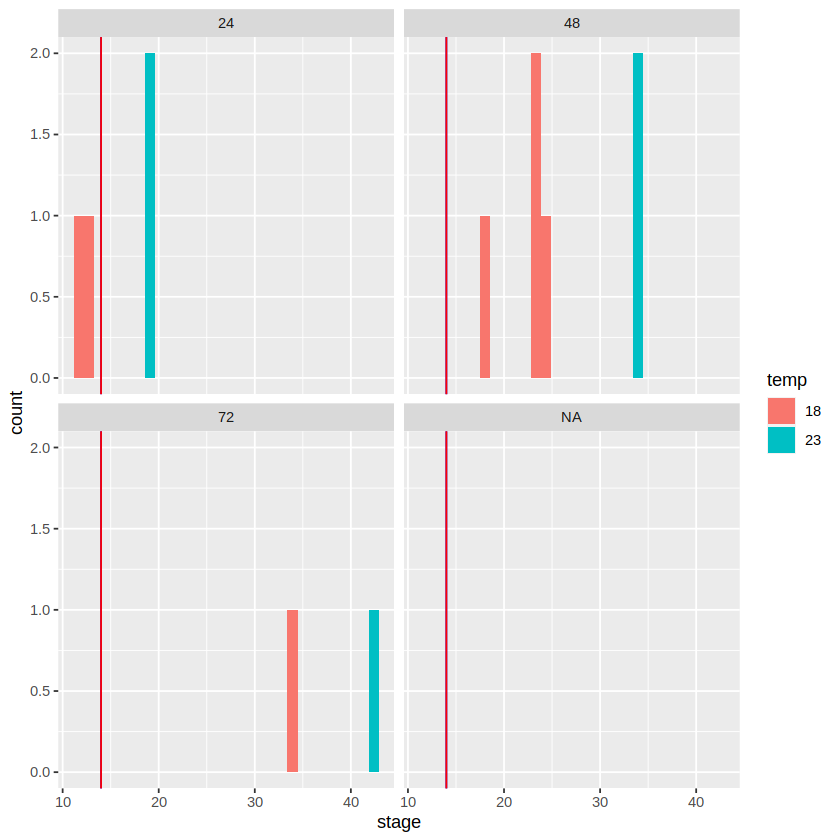

In [7]:
ggplot(data, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=14),color='blue')+
geom_vline(aes(xintercept=14), color='red')+
facet_wrap(~Time)

# 24 h

In [8]:
mean18<-(5*11.25+21*12.25)/26
mean23<-19.5
print("mean 18")
print(mean18)
print("mean 23")
print(mean23)

[1] "mean 18"
[1] 12.05769
[1] "mean 23"
[1] 19.5


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


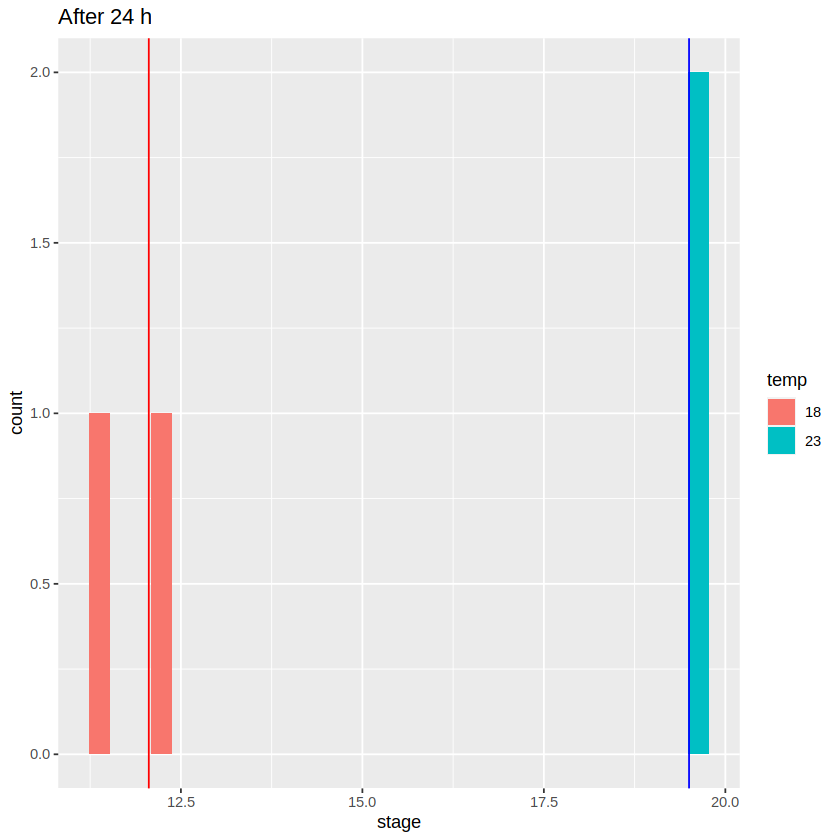

In [9]:
data24<-data|>filter(Time=='24')
ggplot(data24, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=12.05769),color='red')+
geom_vline(aes(xintercept=19.5), color='blue')+
ggtitle("After 24 h")



# 48 h

In [10]:
mean18<-(5*23+2*18.5+16*23+2*24)/(25)
mean23<-(6*33.5+11*34)/17
print("mean 18")
print(mean18)
print("mean 23")
print(mean23)

[1] "mean 18"
[1] 22.72
[1] "mean 23"
[1] 33.82353


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


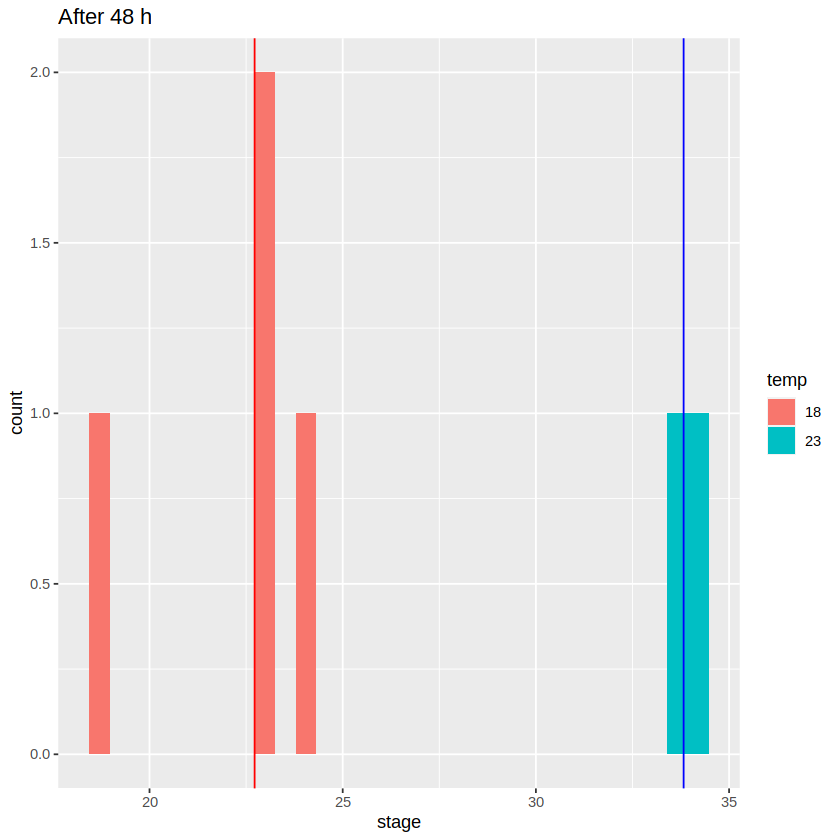

In [11]:
data48<-data|>filter(Time=='48')
ggplot(data48, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=22.72),color='red')+
geom_vline(aes(xintercept=33.82353), color='blue')+
ggtitle("After 48 h")

# 72 h

In [12]:
mean18<-33.5
mean23<-42
print("mean 18")
print(mean18)
print("mean 23")
print(mean23)

[1] "mean 18"
[1] 33.5
[1] "mean 23"
[1] 42


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


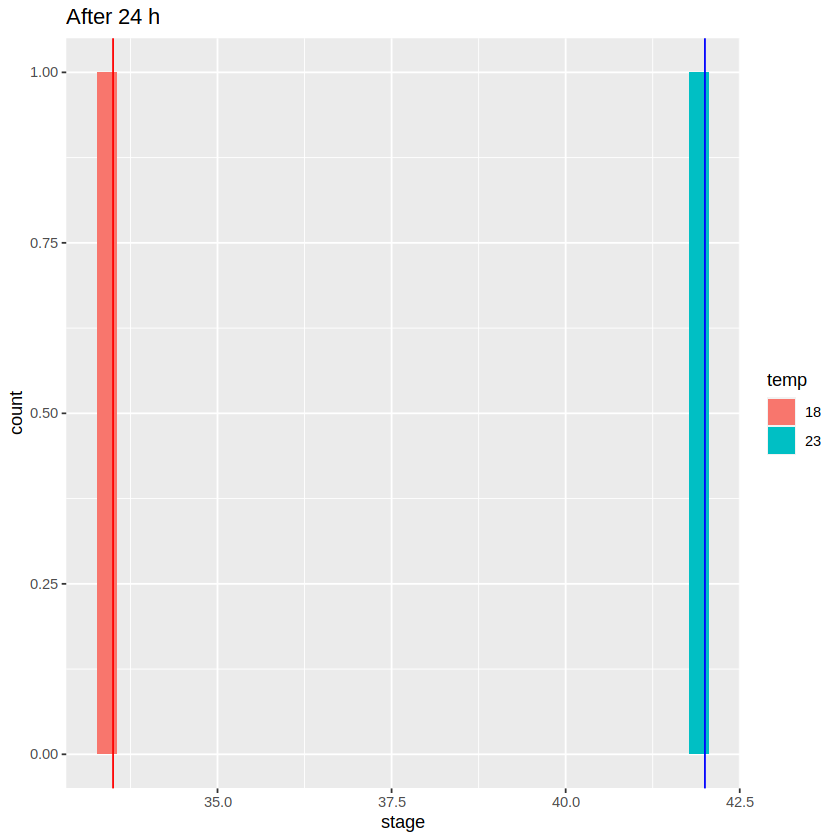

In [13]:
data72<-data|>filter(Time=='72')
ggplot(data72, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=33.5),color='red')+
geom_vline(aes(xintercept=42), color='blue')+
ggtitle("After 24 h")

# mean stage for temp

In [14]:
df3<-data.frame(
    "Time"=c("24 h","24 h","48 h","48 h","72 h","72 h"),
    "mean"=c(12.05769,19.5,22.72,33.82353,33.5,42),
    "temp"=c('18','23', '18','23','18','23'),
    "rate"=c(12.05769/24,19.5/24,22.72/48,33.82353/48,33.5/72,42/72)
    )
df3

Time,mean,temp,rate
<chr>,<dbl>,<chr>,<dbl>
24 h,12.05769,18,0.5024037
24 h,19.50000,23,0.8125000
48 h,22.72000,18,0.4733333
48 h,33.82353,23,0.7046569
72 h,33.50000,18,0.4652778
72 h,42.00000,23,0.5833333


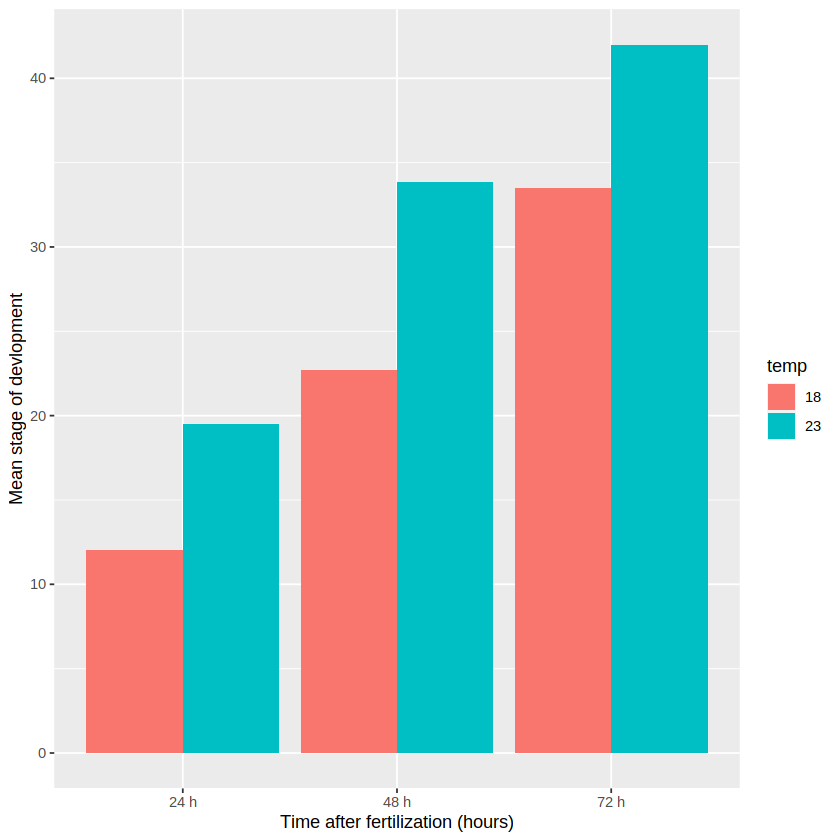

In [15]:
ggplot(df3, aes(x=Time, y=mean, fill=temp))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Time after fertilization (hours)", y="Mean stage of devlopment")

# rate for days

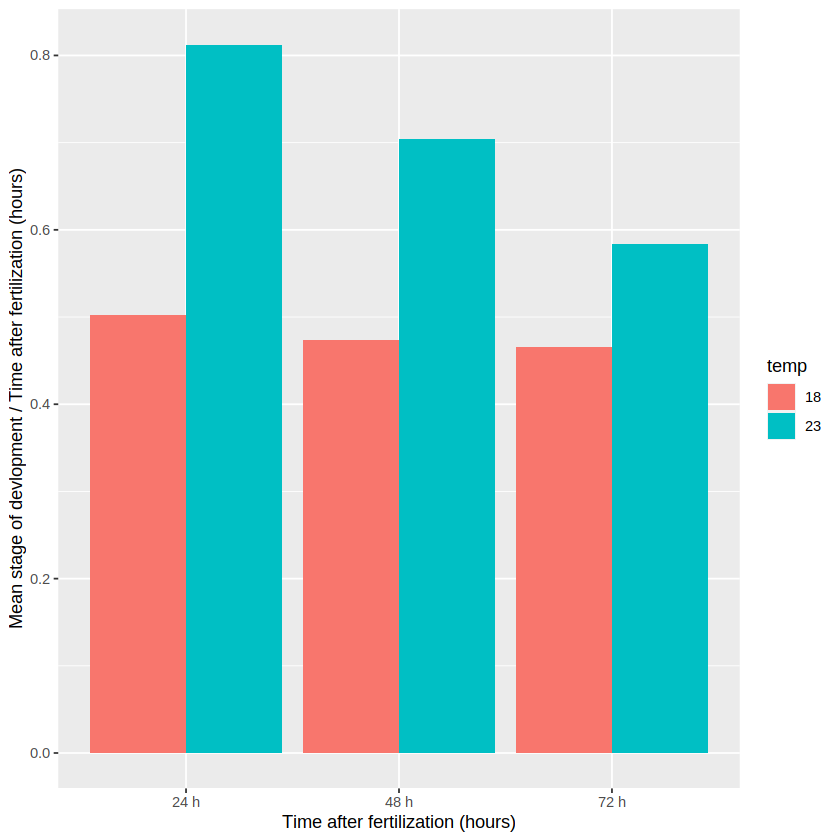

In [16]:
ggplot(df3, aes(x=Time, y=rate, fill=temp))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Time after fertilization (hours)", y="Mean stage of devlopment / Time after fertilization (hours)")

# rate for days based on each 24 h

In [17]:
22.72-12.05769

[1] 10.66231

Time,mean,temp,rate
<chr>,<dbl>,<chr>,<dbl>
24 h,12.05769,18,0.5024037
24 h,19.50000,23,0.8125000
48 h,22.72000,18,0.4442629
48 h,33.82353,23,0.5968137
72 h,33.50000,18,0.4491667
72 h,42.00000,23,0.3406863


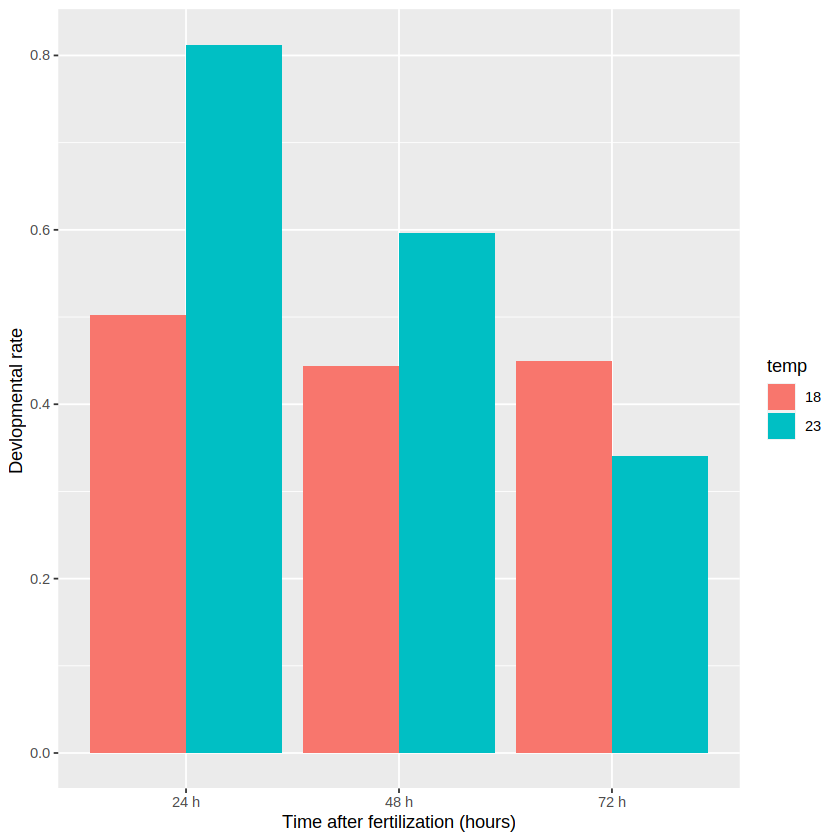

In [18]:
df3<-data.frame(
    "Time"=c("24 h","24 h","48 h","48 h","72 h","72 h"),
    "mean"=c(12.05769,19.5,22.72,33.82353,33.5,42),
    "temp"=c('18','23', '18','23','18','23'),
    "rate"=c(12.05769/24, 19.5/24, 
             (22.72-12.05769)/24,(33.82353-19.5)/24, 
             (33.5-22.72)/24, (42-33.82353)/24)
    )
df3


ggplot(df3, aes(x=Time, y=rate, fill=temp))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Time after fertilization (hours)", y="Devlopmental rate ")

# average rates

temp,ave_rate
<chr>,<chr>
18,0.4652778
23,0.5833333


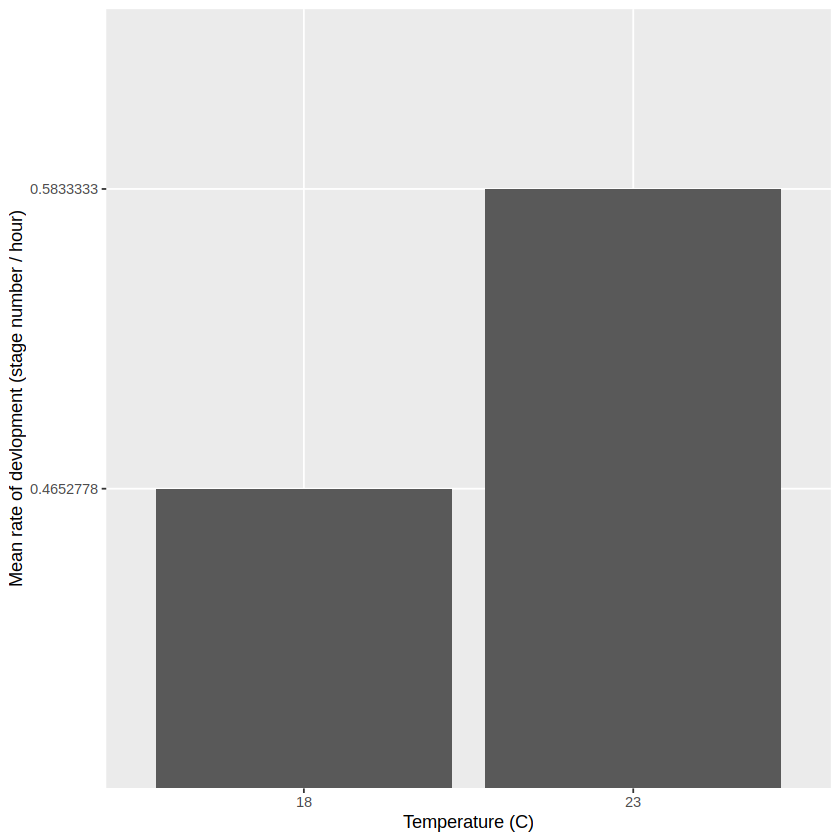

In [19]:
df18<-df3|>filter(temp=='18')|>group_by(temp)|>summarize(ave=mean(rate))
df23<-df3|>filter(temp=='23')|>group_by(temp)|>summarize(ave=mean(rate))

df4<-data.frame(
    "temp"=c('18','23'),
    "ave_rate"=c("0.4652778","0.5833333"))
df4
ggplot(df4, aes(x=temp, y=ave_rate))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Temperature (C)", y="Mean rate of devlopment (stage number / hour)")

the developmental stage was inverted to be numerical in a way that each stage number was assigned that number and a rate of develompent was calculated based on stage number/hours
due to low data avaiblable we had few datasince very low were alive more than 24h
therefore we lacked a full distribution whithin the stages so we couldnt find a good variance to compare the mean rates  via a t test.
a method 

# rate pattern in each temperature

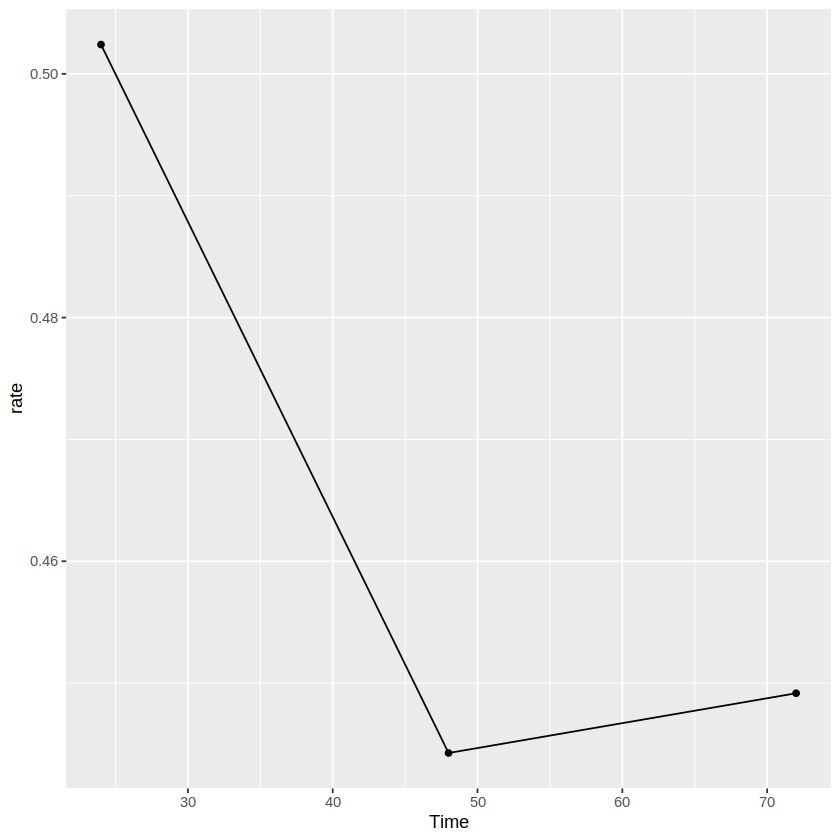

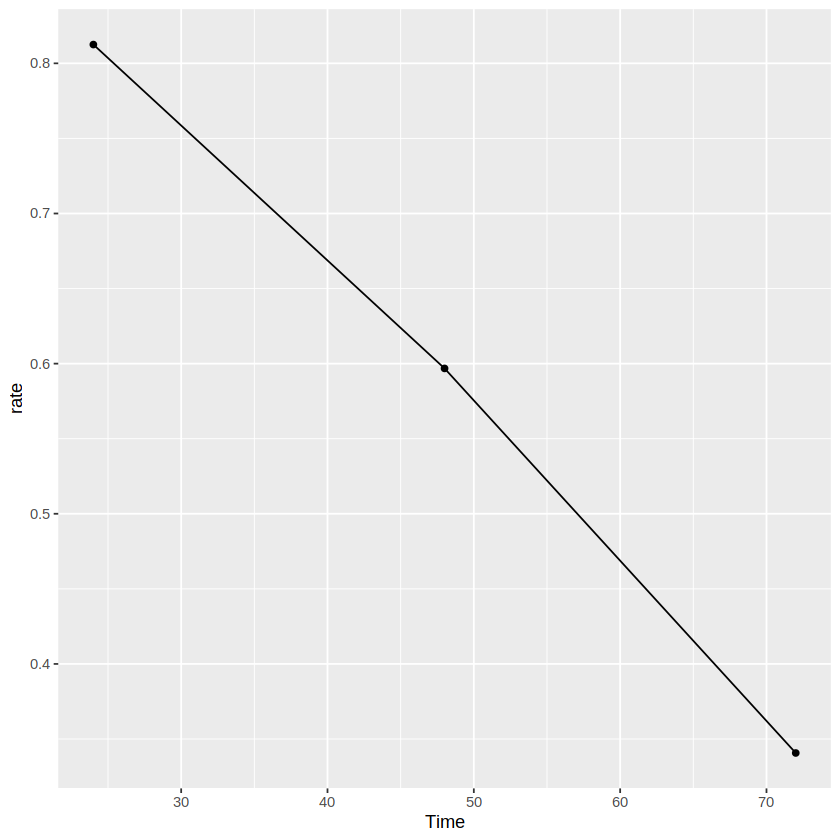

In [25]:
df4<-data.frame(
    "Time"=c(24,24,48,48,72,72),
    "temp"=c('18','23', '18','23','18','23'),
    "rate"=c(12.05769/24, 19.5/24, 
             (22.72-12.05769)/24,(33.82353-19.5)/24, 
             (33.5-22.72)/24, (42-33.82353)/24)
    )
df4.18<-df4|>filter(temp==18)
df4.23<-df4|>filter(temp==23)

ggplot(df4.18,aes(x=Time,y=rate))+
geom_point()+
geom_line()

ggplot(df4.23,aes(x=Time,y=rate))+
geom_point()+
geom_line()